##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [20]:
import numpy as np

file = open('train_X.data', 'rb')
train_images_unexpanded = np.load(file)
file.close()

file = open('train_Y.data', 'rb')
train_labels = np.load(file)
file.close()

file = open('test_X.data', 'rb')
test_images_unexpanded = np.load(file)
file.close()

file = open('test_Y.data', 'rb')
test_labels = np.load(file)
file.close()

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [21]:
train_images_unexpanded.shape

(10000, 16, 16)

In [22]:
train_images = np.expand_dims(train_images_unexpanded, axis=3)
# train_images = train_images_unexpanded
train_images.shape

(10000, 16, 16, 1)

In [23]:
train_labels.shape

(10000,)

In [24]:
test_images = np.expand_dims(test_images_unexpanded, axis=3)
# test_images = test_images_unexpanded
test_images.shape

(2000, 16, 16, 1)

In [25]:
test_images.shape

(2000, 16, 16, 1)

In [26]:
test_labels.shape

(2000,)

In [27]:
# discretize...
# train_labels = np.sign(train_labels + 1)
# test_labels = np.sign(test_labels + 1)

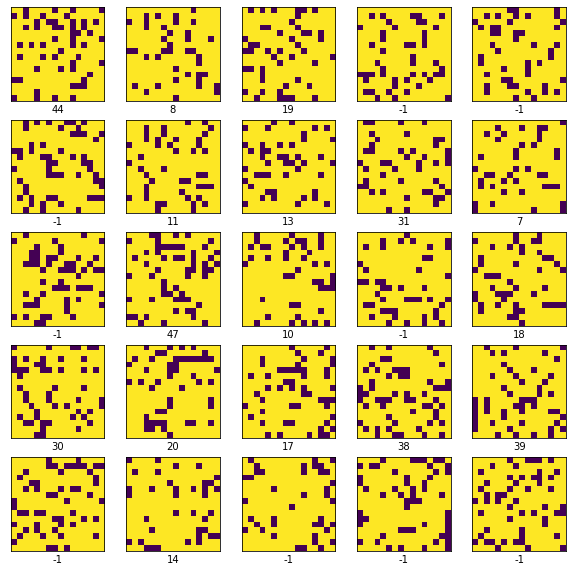

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] * 255)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

Here's the complete architecture of your model:

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                200736    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 201,089
Trainable params: 201,089
Non-trainable params: 0
_________________________________________________________________


The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_squared_error'])

history = model.fit(train_images, train_labels, epochs=10,
              validation_data=(test_images, test_labels))

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 272.1855 - mean_squared_error: 272.1855 - val_loss: 224.4832 - val_mean_squared_error: 224.4832
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 181.0427 - mean_squared_error: 181.0427 - val_loss: 131.4465 - val_mean_squared_error: 131.4465
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 115.1889 - mean_squared_error: 115.1889 - val_loss: 113.1883 - val_mean_squared_error: 113.1883
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 99.7695 - mean_squared_error: 99.7695 - val_loss: 104.5257 - val_mean_squared_error: 104.5257
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 94.3576 - mean_squared_error: 94.3576 - val_loss: 118.0729 - val_mean_squared_error: 118.0729
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 92.1772 - mean_squared_error: 92.1772 - val_loss: 104.9457 - val_mean_squared_er

### Evaluate the model

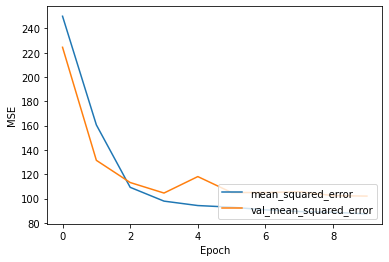

63/63 - 0s - loss: 102.0151 - mean_squared_error: 102.0151


In [48]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [49]:
import math
print(math.sqrt(test_acc))

10.10025315675634


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

In [50]:
iteration = 1
model.save(f'models/scorer_{iteration}.model')

INFO:tensorflow:Assets written to: models/scorer_1.model\assets
